# WIDS

## IPL Data Analysis and Winner Prediction


### ***SIDDHARTH SOLANKI<br>21d070072***

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [108]:
f = pd.read_csv('IPL_Matches_2008_2022.csv')

In [109]:
f.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

## ***DATA PRE PROCESSING***

1)Fill Null values in ‘city’ column

In [110]:
 f[f['City'].isnull()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
134,1237181,NaN,2020-11-10,2020/21,Final,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,bat,N,Mumbai Indians,Wickets,5.0,NaN,TA Boult,"['MP Stoinis', 'S Dhawan', 'AM Rahane', 'SS Iy...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",CB Gaffaney,Nitin Menon
137,1237177,NaN,2020-11-05,2020/21,Qualifier 1,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Delhi Capitals,field,N,Mumbai Indians,Runs,57.0,NaN,JJ Bumrah,"['Q de Kock', 'RG Sharma', 'SA Yadav', 'Ishan ...","['PP Shaw', 'S Dhawan', 'AM Rahane', 'SS Iyer'...",CB Gaffaney,Nitin Menon
138,1216495,NaN,2020-11-03,2020/21,56,Mumbai Indians,Sunrisers Hyderabad,Sharjah Cricket Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,10.0,NaN,S Nadeem,"['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...","['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...",C Shamshuddin,RK Illingworth
140,1216530,NaN,2020-11-01,2020/21,54,Kolkata Knight Riders,Rajasthan Royals,Dubai International Cricket Stadium,Rajasthan Royals,field,N,Kolkata Knight Riders,Runs,60.0,NaN,PJ Cummins,"['Shubman Gill', 'N Rana', 'RA Tripathi', 'SP ...","['RV Uthappa', 'BA Stokes', 'SPD Smith', 'SV S...",Nitin Menon,PR Reiffel
142,1216535,NaN,2020-10-31,2020/21,51,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,9.0,NaN,Ishan Kishan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['Ishan Kishan', 'Q de Kock', 'SA Yadav', 'SS ...",YC Barde,PR Reiffel
143,1216502,NaN,2020-10-31,2020/21,52,Royal Challengers Bangalore,Sunrisers Hyderabad,Sharjah Cricket Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,5.0,NaN,Sandeep Sharma,"['JR Philippe', 'D Padikkal', 'V Kohli', 'AB d...","['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...",KN Ananthapadmanabhan,K Srinivasan
145,1216536,NaN,2020-10-29,2020/21,49,Kolkata Knight Riders,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,6.0,NaN,RD Gaikwad,"['Shubman Gill', 'N Rana', 'SP Narine', 'RK Si...","['SR Watson', 'RD Gaikwad', 'AT Rayudu', 'MS D...",C Shamshuddin,RK Illingworth
147,1216524,NaN,2020-10-27,2020/21,47,Sunrisers Hyderabad,Delhi Capitals,Dubai International Cricket Stadium,Delhi Capitals,field,N,Sunrisers Hyderabad,Runs,88.0,NaN,WP Saha,"['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...","['AM Rahane', 'S Dhawan', 'MP Stoinis', 'SO He...",AK Chaudhary,Nitin Menon
148,1216520,NaN,2020-10-26,2020/21,46,Kolkata Knight Riders,Kings XI Punjab,Sharjah Cricket Stadium,Kings XI Punjab,field,N,Kings XI Punjab,Wickets,8.0,NaN,CH Gayle,"['Shubman Gill', 'N Rana', 'RA Tripathi', 'KD ...","['KL Rahul', 'Mandeep Singh', 'CH Gayle', 'N P...",KN Ananthapadmanabhan,RK Illingworth
150,1216544,NaN,2020-10-25,2020/21,44,Royal Challengers Bangalore,Chennai Super Kings,Dubai International Cricket Stadium,Royal Challengers Bangalore,bat,N,Chennai Super Kings,Wickets,8.0,NaN,RD Gaikwad,"['D Padikkal', 'AJ Finch', 'V Kohli', 'AB de V...","['RD Gaikwad', 'F du Plessis', 'AT Rayudu', 'M...",C Shamshuddin,RK Illingworth


2)Check unique values in team name’s columns (team1 and team2) and replace two names for the same team with a single name.

In [111]:
for team in f['Team1'].unique():
    print(team)

Rajasthan Royals
Royal Challengers Bangalore
Sunrisers Hyderabad
Delhi Capitals
Chennai Super Kings
Gujarat Titans
Lucknow Super Giants
Kolkata Knight Riders
Punjab Kings
Mumbai Indians
Kings XI Punjab
Delhi Daredevils
Rising Pune Supergiant
Gujarat Lions
Rising Pune Supergiants
Pune Warriors
Deccan Chargers
Kochi Tuskers Kerala


In [112]:
f["Team2"]=f["Team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
f["Team1"]=f["Team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
f["WinningTeam"]=f["WinningTeam"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
f["TossWinner"]=f["TossWinner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [113]:
for team in f['Team1'].unique():
    print(team)

Rajasthan Royals
Royal Challengers Bangalore
Sunrisers Hyderabad
Delhi Capitals
Chennai Super Kings
Gujarat Titans
Lucknow Super Giants
Kolkata Knight Riders
Punjab Kings
Mumbai Indians
Kings XI Punjab
Delhi Daredevils
Rising Pune Supergiants
Gujarat Lions
Pune Warriors
Deccan Chargers
Kochi Tuskers Kerala


In this case, the team was Rising Pune Supergiants.

3) Replace string columns to numeric values.<br>
Here we assign numerical values to data signifying winning etc. 

In [114]:
# f["Team1"]=le.fit_transform(f["Team1"])
# f["Team2"]=le.fit_transform(f["Team2"])
# le.transform(["Rajasthan Royals","Gujarat Lions"])

4) Dropping Insignificant Columns<br> "Method" has most empty coulmns

In [115]:
f = f.drop(columns=['method'], axis=1)

5)Drop all rows where winner values are missing.

In [116]:
f[f['WinningTeam'].isnull()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
464,829763,Bangalore,2015-04-29,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
708,501265,Delhi,2011-05-21,2011,68,Delhi Daredevils,Pune Warriors,Feroz Shah Kotla,Delhi Daredevils,bat,NaN,NaN,NoResults,NaN,NaN,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker


In [117]:
f=f.dropna(subset=['WinningTeam'])

In [118]:
f[f['WinningTeam'].isnull()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2


## ***Exploratory Data Analysis***

1)Which player has won the most number of Man of the Match (MoM) awards?


In [68]:
print(f['Player_of_Match'].value_counts())

AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
                  ..
CR Brathwaite      1
Mohsin Khan        1
A Zampa            1
BCJ Cutting        1
MF Maharoof        1
Name: Player_of_Match, Length: 262, dtype: int64


Ans - ABD

2)Which team has won the most tosses?


In [69]:
print(f['TossWinner'].value_counts())

Mumbai Indians                 123
Kolkata Knight Riders          114
Chennai Super Kings            109
Royal Challengers Bangalore    104
Rajasthan Royals                97
Kings XI Punjab                 85
Delhi Daredevils                79
Sunrisers Hyderabad             74
Deccan Chargers                 43
Delhi Capitals                  36
Pune Warriors                   20
Gujarat Lions                   15
Rising Pune Supergiants         13
Gujarat Titans                  10
Punjab Kings                     9
Kochi Tuskers Kerala             8
Lucknow Super Giants             7
Name: TossWinner, dtype: int64


We already knew the answer, didn't we. 

In [74]:
print(f['Team1'].value_counts() + f['Team2'].value_counts())
#number of matches played by the teams

Chennai Super Kings            208
Deccan Chargers                 75
Delhi Capitals                  63
Delhi Daredevils               159
Gujarat Lions                   30
Gujarat Titans                  16
Kings XI Punjab                190
Kochi Tuskers Kerala            14
Kolkata Knight Riders          223
Lucknow Super Giants            15
Mumbai Indians                 231
Pune Warriors                   45
Punjab Kings                    28
Rajasthan Royals               190
Rising Pune Supergiants         30
Royal Challengers Bangalore    223
Sunrisers Hyderabad            152
dtype: int64


In [79]:
ambani_ki_kripa = f['TossWinner'].value_counts()*100/(f['Team1'].value_counts() + f['Team2'].value_counts())
print(ambani_ki_kripa)
#percentage wins by teams

Chennai Super Kings            52.403846
Deccan Chargers                57.333333
Delhi Capitals                 57.142857
Delhi Daredevils               49.685535
Gujarat Lions                  50.000000
Gujarat Titans                 62.500000
Kings XI Punjab                44.736842
Kochi Tuskers Kerala           57.142857
Kolkata Knight Riders          51.121076
Lucknow Super Giants           46.666667
Mumbai Indians                 53.246753
Pune Warriors                  44.444444
Punjab Kings                   32.142857
Rajasthan Royals               51.052632
Rising Pune Supergiants        43.333333
Royal Challengers Bangalore    46.636771
Sunrisers Hyderabad            48.684211
dtype: float64


By percentage, Gujrat Titans is the luckiest team in the IPL. But in the long run, according to *data*, MI is the luckiest.

3)Which stadium/city hosted the most number of IPL matches?

In [80]:
print(f['Venue'].value_counts())

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   63
Feroz Shah Kotla                                        59
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     46
Punjab Cricket Association Stadium, Mohali              35
Wankhede Stadium, Mumbai                                31
Sheikh Zayed Stadium                                    29
Sharjah Cricket Stadium                                 28
Maharashtra Cricket Association Stadium                 22
Dr DY Patil Sports Academy, Mumbai                      20
Dr DY Patil Sports Academy                              17
Brabourne Stadium, Mumbai                               17
Subrata Roy Sahara Stadium                              

Eden Gardens has hosted max number of IPL matches.

In [142]:
city_max = f['City'].value_counts()

city_max_f = pd.DataFrame(columns=["City", "Matches"])
count = 0
for items in city_max.iteritems():
    if count>12:
        break
    else:
        temp_f2 = pd.DataFrame({
            'City':[items[0]],
            'Matches':[items[1]]
        })
        city_max_f = pd.concat([city_max_f,temp_f2])
        count += 1 

In [104]:
city_max_f

,City,Matches
0,Mumbai,159
0,Kolkata,79
0,Delhi,77
0,Chennai,67
0,Hyderabad,64
0,Bangalore,63
0,Chandigarh,56
0,Pune,51
0,Jaipur,47
0,Abu Dhabi,37


<BarContainer object of 13 artists>

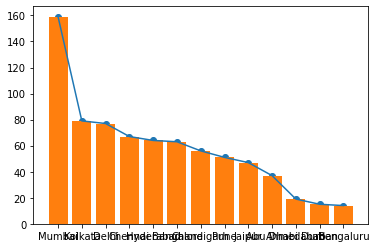

In [115]:
x = city_max_f['City']
y = city_max_f['Matches']
plt.scatter(x, y)
plt.plot(x,y)
plt.bar(x,y)

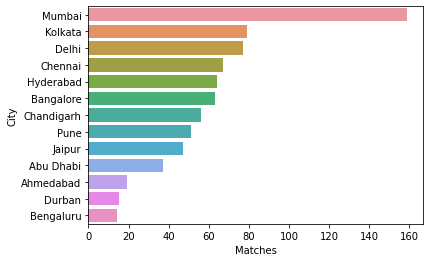

In [125]:
sns.barplot(y='City', x='Matches', data=city_max_f);

Mumbai has hosted the most IPL games

4)Which team has won the most number/percentage of matches?


In [126]:
print(f['WinningTeam'].value_counts())

Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Rajasthan Royals                96
Kings XI Punjab                 88
Sunrisers Hyderabad             75
Delhi Daredevils                67
Delhi Capitals                  36
Deccan Chargers                 29
Rising Pune Supergiants         15
Punjab Kings                    13
Gujarat Lions                   13
Pune Warriors                   12
Gujarat Titans                  12
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Name: WinningTeam, dtype: int64


In [ ]:
# win_max = f['WinningTeam'].value_counts()

# win_max_f = pd.DataFrame(columns=["Team", "Wins", "Win Percentage"])
# count = 0
# for items in win_max.iteritems():
#     if count>13:
#         break
#     else:
#         temp_f2 = pd.DataFrame({
#             'City':[items[0]],
#             'Matches':[items[1]]
#         })
#         city_max_f = pd.concat([city_max_f,temp_f2])
#         count += 1 

In [25]:
 win_percentage = f['WinningTeam'].value_counts()*100/(f['Team1'].value_counts() + f['Team2'].value_counts())


In [ ]:
# for i in win_percentage:
#     win_per_f = pd.Dataframe(columns=["Team", "Win Percentage"])

In [26]:
print(win_percentage)

Chennai Super Kings            58.173077
Deccan Chargers                38.666667
Delhi Capitals                 57.142857
Delhi Daredevils               41.614907
Gujarat Lions                  43.333333
Gujarat Titans                 75.000000
Kings XI Punjab                46.315789
Kochi Tuskers Kerala           42.857143
Kolkata Knight Riders          51.121076
Lucknow Super Giants           60.000000
Mumbai Indians                 56.709957
Pune Warriors                  26.086957
Punjab Kings                   46.428571
Rajasthan Royals               50.000000
Rising Pune Supergiant         62.500000
Rising Pune Supergiants        35.714286
Royal Challengers Bangalore    48.230088
Sunrisers Hyderabad            49.342105
dtype: float64


In [74]:
win_percentage_f = pd.DataFrame({'Team' : win_percentage})
display(win_percentage_f)

,Team
Chennai Super Kings,58.173077
Deccan Chargers,38.666667
Delhi Capitals,57.142857
Delhi Daredevils,41.614907
Gujarat Lions,43.333333
Gujarat Titans,75.000000
Kings XI Punjab,46.315789
Kochi Tuskers Kerala,42.857143
Kolkata Knight Riders,51.121076
Lucknow Super Giants,60.000000


5) Which player has played the most no. of matches?

In [103]:
# print(f['Team1Players'].value_counts())

In [104]:
players_all_1 = pd.DataFrame(f.Team1Players.str.split(",", expand = True))
players_all_2 = pd.DataFrame(f.Team2Players.str.split(",", expand = True))

In [105]:
# display(players_all_1)
# display(players_all_2)

In [106]:
# for i in range(0,10):
#     sum_players = sum_players + players_all_1[i].value_counts()
# print(sum_players)